Load data, including normalized zone coordinates.

In [1]:
import pandas as pd

df = pd.read_csv('../../Data/SMTO_2015/SMTO_2015_Complete_Input.csv')
df = df[df['Level'] != 'Other']

zones = pd.read_csv('../../Data/Zones.csv').set_index('Zone#')
temp = pd.DataFrame([[a[i] for a in (zones['PD'], zones['X'], zones['Y'])] for i in df['HomeZone']], columns=['PD', 'X', 'Y'], index=df.index)
df = pd.concat((df, temp), axis=1)

df['X'] = (df['X'] - df['X'].min()) / (df['X'].max() - df['X'].min())
df['Y'] = (df['Y'] - df['Y'].min()) / (df['Y'].max() - df['Y'].min())

Prepare training and testing set.

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.48480662983425415, 0.4252473268626596, 0.3133706084657786, 0.29914079771030233, 0.27266566287268607, 0.37902058698336677]

MI OC RY SC SG YG YK
150 0 12 2 73 0 45
13 0 9 2 86 0 17
82 0 61 43 445 0 190
5 0 10 93 147 0 62
87 0 53 41 1370 1 213
9 0 4 4 48 6 24
88 0 23 24 376 0 426

79.16944846586496 7.070260660791768 53.79215965865001 5.46610370550492 73.99759049912488 4.933914802038551 57.570522208024926
6.6576922651996 5.7392101034286025 26.234005583564 7.6245356745886275 56.411322975240914 2.3469355428745535 21.986297855103714
52.11003752297657 30.450985473893947 182.4781074404162 64.17840126441412 304.7615778216286 17.813745770642306 169.20714470602837
6.566054096609113 8.81830092059506 58.38515525115231 84.34242703254944 90.09173300229452 7.7529439846712584 61.04338571212812
68.22531207607089 58.84504788891896 288.3018811772122 85.59547714864831 967.2552822855124 28.740783431561436 268.0362159920754
5.88779965420205 2.61002421263927 18.631429183320968 7.342853778486979 31.15905683

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.4677716390423573, 0.39393590356714864, 0.2949390972897805, 0.2870112755367843, 0.24339689080409066, 0.36863659867827536]

MI OC RY SC SG YG YK
111 0 18 2 99 0 47
13 0 8 6 97 0 21
67 0 86 42 464 0 180
3 0 41 118 124 1 36
72 0 86 59 1359 0 194
6 0 6 5 55 3 20
50 0 56 38 396 0 355

74.78484711917876 6.35065089799746 51.67862187491793 5.9813978379665125 75.76278195546587 5.639739354295424 56.80196096017801
8.608573722637567 5.4083605320687935 27.756152482647106 8.849119485986321 64.00005555963382 2.7709651402308015 27.606773076795566
58.68128435114177 28.20820110304639 184.85567067885674 60.93819478382286 307.02059201533353 18.537471511694783 180.75858555610353
6.38425879360699 8.748364340785626 62.80648451794198 88.40924736124121 88.21615952798452 8.172398276236478 60.26308718220332
71.88552561548366 58.03451012441649 292.5613809267472 95.64897591526412 943.0385091565036 30.01980088975993 278.8112973718194
4.2599734504665285 2.7198462725591535 19.662356466278933 8.111032754654143 33.05

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.4864180478821363, 0.45310134664445606, 0.3226592931506567, 0.3167055678633139, 0.2803414211812233, 0.376305948209373]

MI OC RY SC SG YG YK
130 0 7 1 84 0 46
12 0 9 5 82 0 22
61 0 95 53 437 0 197
2 0 24 115 156 0 34
71 0 62 54 1328 0 207
1 0 3 9 48 8 25
61 0 35 49 374 0 437

81.77104342055524 6.373369869937008 50.9911345639765 4.25670425167813 71.67570243115739 4.92729674480485 48.00474871789084
7.870782200112137 5.594305689748614 26.88557336910389 8.39908549926924 54.97850660518401 2.2327751143075782 24.038971522274508
52.787610528018526 30.0262741131417 193.44152264071613 62.17848100773911 308.6342088732117 19.014383738054 176.91751909911935
5.460998136190166 9.731756521286805 63.99688477838928 89.33178994884672 93.85697909233294 8.08835956175947 60.533231961194566
72.04730531887289 60.35679359471972 282.8377334363863 85.94833644170087 930.2742981290907 29.21852144305125 261.31701163617515
4.800281073244061 2.4155745319812083 17.557279629278902 7.766746492876068 30.056025068777473

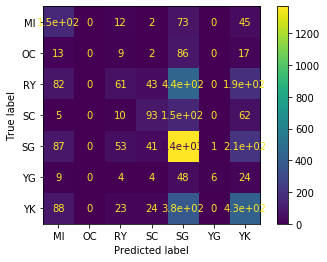

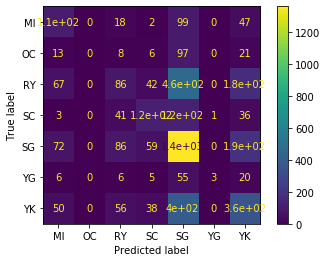

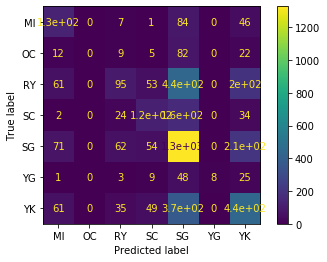

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

std_dists = df.iloc[:, 17:24]
three_dists = df.iloc[:,18:21] # YK, SC, MI
coords = df[['X', 'Y']]
y = df['School_Codes']
metric_names = ['Acc', 'Prec', 'Rec', 'F1', 'MCC', 'APO']
rf = RandomForestClassifier(n_estimators=60, min_samples_split=14, min_samples_leaf=12, max_depth=8)

for x in (std_dists, three_dists, coords):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)    
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)
    probs = pd.concat((y_test.reset_index(drop=True), pd.DataFrame(rf.predict_proba(X_test))), axis=1)
    schools = list(rf.classes_)
    
    metrics_list = [rf.score(X_test, y_test)]      
    metrics_list.extend(precision_recall_fscore_support(y_test, preds, average = 'macro')[:3])
    metrics_list.append(matthews_corrcoef(y_test, preds))
    metrics_list.append(probs.apply(lambda z: z[schools.index(z.School_Codes)], axis=1).mean())
    print(metrics_list)
    
    print()
    cm = plot_confusion_matrix(rf, X_test, y_test).confusion_matrix
    print(*schools)
    for lst in cm:
        print(*lst)
    
    print()
    for school in schools:
        print(*probs[probs['School_Codes'] == school][list(range(7))].sum().values)

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.340632603406326, 0.22778268266790755, 0.23499869476485566, 0.22503125124813453, 0.13497387360694035, 0.25885476556208964]

MI OC RY SC SG YG YK
62 0 17 4 51 0 62
9 0 11 1 42 0 12
51 0 66 34 235 0 152
2 0 43 66 106 0 40
50 0 82 40 400 0 168
3 0 7 6 28 0 14
41 0 53 37 225 0 246

41.05607982368977 4.457784456114118 43.936307985979596 5.055766712870997 48.61685752116568 4.525775404980414 48.35142809519935
6.3208459943803925 2.2567025051929352 16.999690610838066 6.674299360237775 23.568866817209436 1.9428639827669858 17.236730729374408
43.313234072062954 13.75435414939742 123.21030799381127 49.35673926179926 157.75435791954598 14.302084971920308 136.3089216314626
6.199825338321184 7.394719025520278 59.82651036305492 47.42768510028636 72.95369209183332 7.3394210414006 55.858147039583336
50.893995607792554 20.69934489881672 167.31323344298485 63.37035905233183 251.01576208666907 18.181649118774782 168.52565579262992
3.516842998279633 1.605610093593121 14.121692501043157 6.027012153965669 1

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.3398215733982157, 0.23333942824674891, 0.2319493704490774, 0.2282269616868172, 0.13200084019517905, 0.25647528289870575]

MI OC RY SC SG YG YK
59 0 39 1 48 0 62
4 0 13 3 39 0 11
39 0 74 45 227 0 148
2 0 44 68 113 0 30
37 0 91 39 389 0 177
4 0 8 3 26 0 14
22 0 97 37 205 0 248

44.46339398934978 5.972631520133199 49.2801047088488 3.877569513599979 50.68044081522452 4.165276339110648 50.56058311373308
4.276052392261064 2.1903980746951897 15.761711815871713 7.809399573840207 22.611530457857118 1.8680863326668526 15.482821352807864
41.655822601714824 14.212053853480446 123.88371454495265 51.83089622335796 156.8702791909332 14.454002063578521 130.09323152198237
6.583365062039302 7.258192458227681 58.882313227208535 48.2119042845065 74.29432078642108 7.812621433329797 53.957282748267126
51.36829448277823 20.83932669046766 168.41743971568164 62.955830295103716 243.5208894873279 18.781472135023275 167.11674719361747
4.422968361363702 1.356613346893706 12.877673757134383 4.976276565621923 16.

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.3491484184914842, 0.23580480370761703, 0.24557787116384497, 0.22771475949513403, 0.1531765571421016, 0.2605627600524657]

MI OC RY SC SG YG YK
77 0 26 4 45 0 43
6 0 8 2 33 0 22
57 0 59 35 250 0 162
2 0 38 57 121 0 39
65 0 44 26 418 0 159
5 0 6 4 29 0 15
68 0 41 24 226 0 250

44.79756265447917 5.656573443021221 43.8569886789292 5.315753924300309 49.25451621802803 4.2683443102992715 41.85026077094285
4.72858907474674 2.0429400240728794 16.546423400576778 6.800121983924333 21.73777332119528 1.9514600736679462 17.192692121816048
45.01453865477462 15.726318961947184 127.7286134232235 53.136775609235265 169.27909125479582 13.739857253802805 138.37480484222064
3.940675770436075 8.202916829561435 59.42298737738497 48.46833180839301 74.70159538000074 6.645469938187671 55.618022896036095
52.55188566943603 20.56417071810143 153.2613557370561 61.29697704454373 247.05360439461785 17.658617598187032 159.61338883805792
3.7803310734822135 1.7122020756047949 13.814755744893368 6.376332975835382 17.9

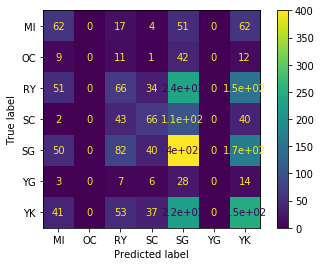

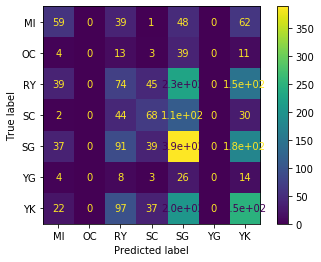

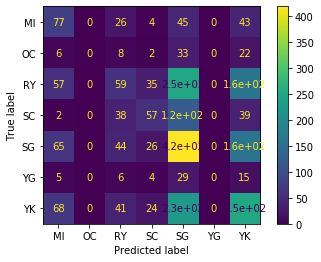

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

temp = df[df['Family'] == 1]
std_dists = temp.iloc[:, 17:24]
three_dists = temp.iloc[:,18:21] # YK, SC, MI
coords = temp[['X', 'Y']]
y = temp['School_Codes']
metric_names = ['Acc', 'Prec', 'Rec', 'F1', 'MCC', 'APO']
rf = RandomForestClassifier(n_estimators=60, min_samples_split=14, min_samples_leaf=12, max_depth=8)

for x in (std_dists, three_dists, coords):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)    
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)
    probs = pd.concat((y_test.reset_index(drop=True), pd.DataFrame(rf.predict_proba(X_test))), axis=1)
    schools = list(rf.classes_)
    
    metrics_list = [rf.score(X_test, y_test)]      
    metrics_list.extend(precision_recall_fscore_support(y_test, preds, average = 'macro')[:3])
    metrics_list.append(matthews_corrcoef(y_test, preds))
    metrics_list.append(probs.apply(lambda z: z[schools.index(z.School_Codes)], axis=1).mean())
    print(metrics_list)
    
    print()
    cm = plot_confusion_matrix(rf, X_test, y_test).confusion_matrix
    print(*schools)
    for lst in cm:
        print(*lst)
    
    print()
    for school in schools:
        print(*probs[probs['School_Codes'] == school][list(range(7))].sum().values)

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.6863684771033014, 0.621597701783663, 0.47514944450505, 0.5092681405839345, 0.4657022112306517, 0.5467877687133915]

MI OC RY SC SG YG YK
61 0 0 0 19 0 2
0 0 5 0 68 0 0
7 0 43 4 190 1 12
0 0 0 55 25 0 1
12 0 29 3 974 1 23
0 0 0 1 20 11 1
10 0 6 2 147 0 145

45.942080363746165 1.144281849497671 5.282707488582271 0.4619509454130189 19.70285602187769 1.0258160187579097 8.440307312125281
1.4539441685107413 4.081997901254773 12.748597860862851 1.4538115488286107 43.52679085154209 0.7614965098752706 8.973361159125671
7.68016164288729 12.262103022234852 56.61303429700465 6.773175645656737 136.728536701267 4.245189362390913 32.69779932855851
0.38866182149788314 1.1908632063297526 5.784167838740087 48.654441890158395 18.52453925914553 0.7751644519484757 5.682161532179892
21.286100408762096 36.278523364899115 128.06955639442467 19.91340834269332 716.3348036187654 11.76660414397284 108.35100372648458
0.28023690389971917 0.6630034333237512 4.2248469120622065 1.1861008892158218 12.494370720312538

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.6789137380191693, 0.629507063841033, 0.4418430260962212, 0.4715444682757724, 0.45103759524412046, 0.5383378494254312]

MI OC RY SC SG YG YK
68 0 0 0 25 0 0
1 0 11 0 59 0 3
6 0 47 1 174 0 20
0 0 1 53 28 0 1
13 0 22 7 965 0 35
0 0 0 1 23 5 2
11 0 3 5 151 0 137

48.52008135338932 1.6195694695206535 7.532622007124359 0.6383345628271387 23.8259205424412 1.345038746001516 9.518433318695811
1.55700810067372 3.8262091876556723 15.433693975444598 1.4565386675505214 41.13204743471927 0.9746632562960829 9.61983937766012
5.520700802657354 10.973106925476262 58.37804682381588 5.879426231333415 126.98924145096743 4.687023781245678 35.57245398450396
0.3589397577216328 1.7362553551720878 6.753692602914264 46.66125041623731 20.88175091908027 0.6293231054326109 5.9787878434418396
19.629047789338745 38.65626177757181 130.01339387951577 19.49077782932536 711.632403007852 12.093148344048707 110.48496737234653
0.24502701935664054 0.739121151468633 3.7983330316484873 1.6099091704880304 14.428301359613036 

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.6773162939297125, 0.579887721215442, 0.42955523089239683, 0.4529908111798145, 0.4241093595513967, 0.5407456805289205]

MI OC RY SC SG YG YK
51 0 0 0 17 0 0
0 0 3 1 59 0 6
7 0 33 2 186 0 23
0 0 1 42 27 0 1
10 0 23 3 997 2 40
3 0 0 0 23 5 5
3 0 3 5 153 0 144

41.47439830525216 0.9050861618684429 4.152140864179808 0.1837355260486233 16.008467957503584 0.11340506660663657 5.162766118540743
1.2116927333845398 3.56827018465987 11.76288886306041 1.8313947607882322 40.80039107865046 0.5927348174877304 9.232627561968751
8.776470853937578 11.796824845278943 55.87412075272776 6.534423182818673 128.25500017662603 3.6691280684352003 36.09403212017583
0.45297076287920374 1.515670111682387 6.140200626006599 35.66689503481169 20.20887274381051 0.9305462557232631 6.084844465086351
22.41502495043289 38.495863515054225 132.81104787630287 20.562316379090586 735.7975075162292 11.950007293692204 112.96823246919874
2.039609375274422 0.8902086614290857 4.562602148477757 1.3572142011196955 14.47821611577247

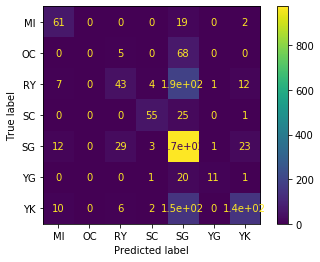

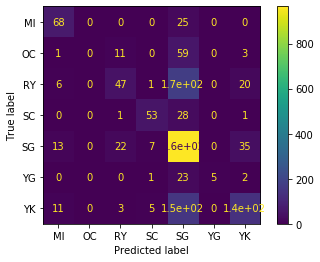

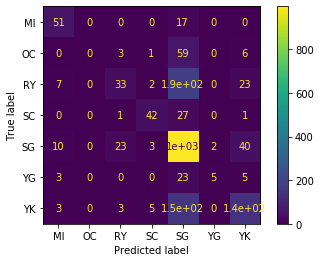

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

temp = df[df['Family'] == 0]
std_dists = temp.iloc[:, 17:24]
three_dists = temp.iloc[:,18:21] # YK, SC, MI
coords = temp[['X', 'Y']]
y = temp['School_Codes']
metric_names = ['Acc', 'Prec', 'Rec', 'F1', 'MCC', 'APO']
rf = RandomForestClassifier(n_estimators=60, min_samples_split=14, min_samples_leaf=12, max_depth=8)

for x in (std_dists, three_dists, coords):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)    
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)
    probs = pd.concat((y_test.reset_index(drop=True), pd.DataFrame(rf.predict_proba(X_test))), axis=1)
    schools = list(rf.classes_)
    
    metrics_list = [rf.score(X_test, y_test)]      
    metrics_list.extend(precision_recall_fscore_support(y_test, preds, average = 'macro')[:3])
    metrics_list.append(matthews_corrcoef(y_test, preds))
    metrics_list.append(probs.apply(lambda z: z[schools.index(z.School_Codes)], axis=1).mean())
    print(metrics_list)
    
    print()
    cm = plot_confusion_matrix(rf, X_test, y_test).confusion_matrix
    print(*schools)
    for lst in cm:
        print(*lst)
    
    print()
    for school in schools:
        print(*probs[probs['School_Codes'] == school][list(range(7))].sum().values)